In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report,confusion_matrix
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.model_selection import train_test_split

In [6]:
data=pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.shape

(284807, 31)

In [9]:
data["Class"].unique()

array([0, 1])

In [10]:
data.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [11]:
data.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [12]:
data.duplicated().sum()

np.int64(1081)

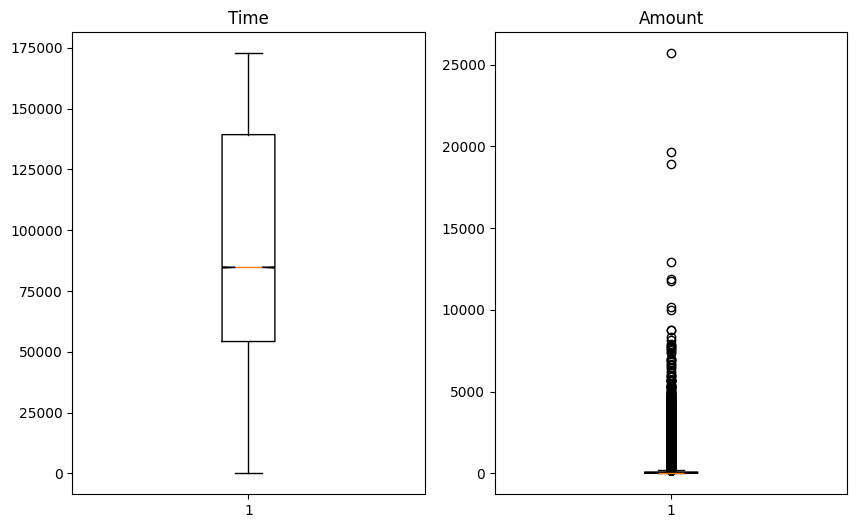

In [13]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.boxplot(x=data["Time"],notch=True)
plt.title("Time")
plt.subplot(1,2,2)
plt.boxplot(x=data["Amount"],notch=True)
plt.title("Amount")
plt.show()

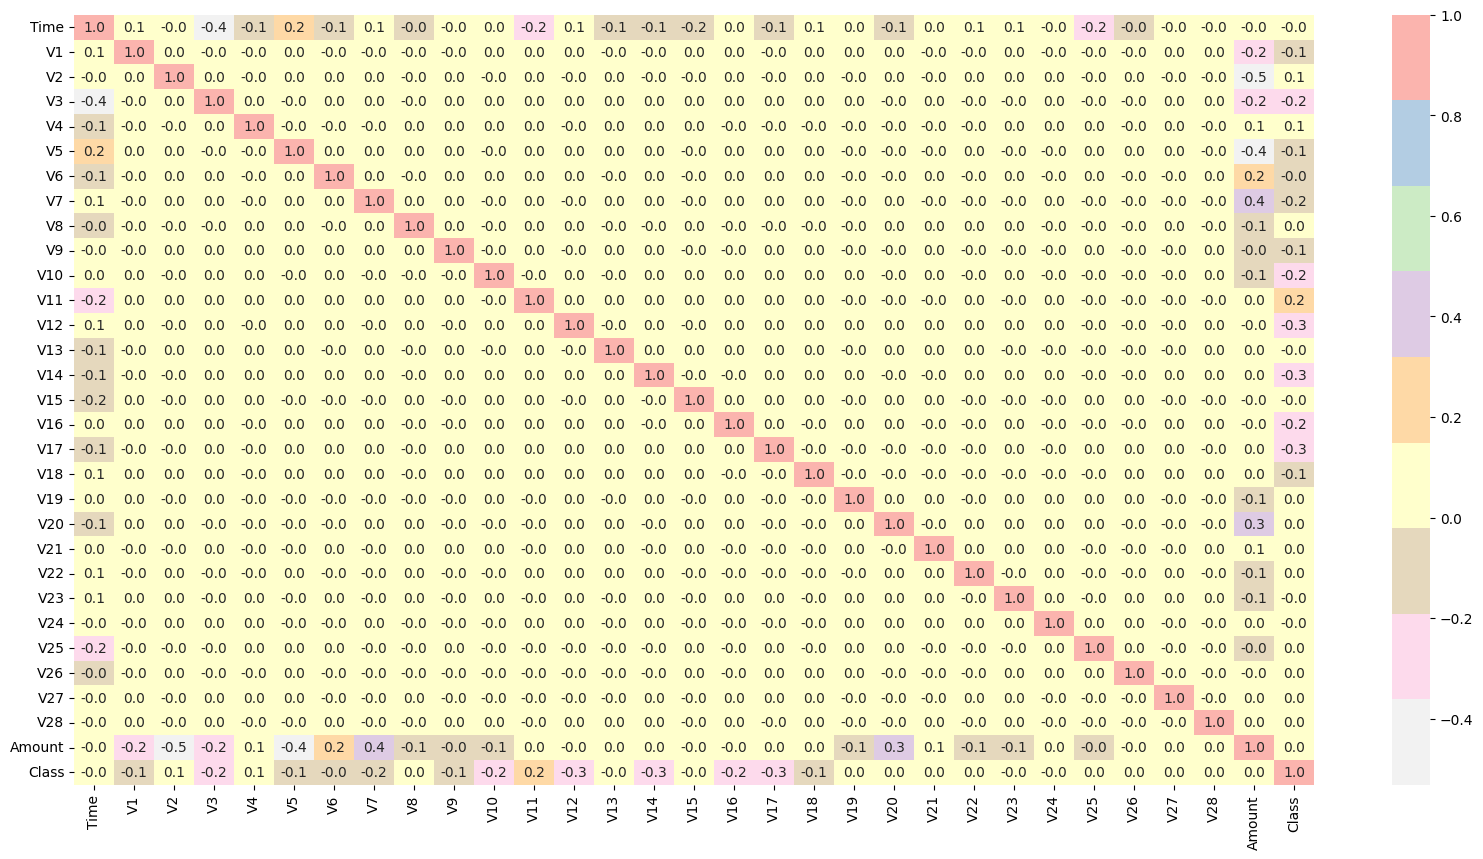

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),fmt=".1f",annot=True,cmap='Pastel1_r')
plt.show()

C:\Users\ABARNA SANKAR\AppData\Local\Temp\ipykernel_6380\37985444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.countplot(x=data["Class"],palette=["g","m"])


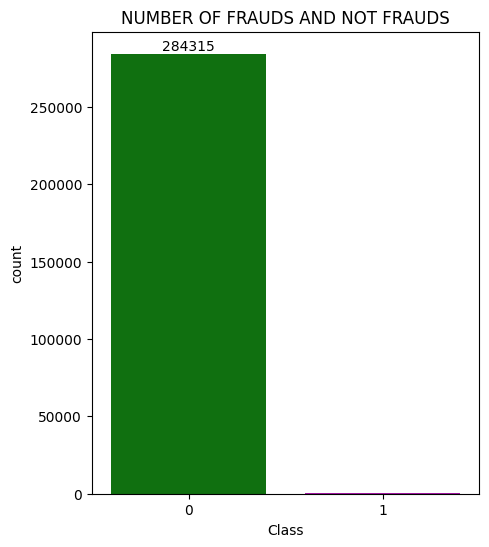

In [16]:
plt.figure(figsize=(5,6))
plot=sns.countplot(x=data["Class"],palette=["g","m"])
plot.bar_label(plot.containers[0])
plt.title("NUMBER OF FRAUDS AND NOT FRAUDS")
plt.show()

In [17]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [18]:
data.shape

(283726, 31)

In [23]:
features=data.drop("Class",axis=1)
target=data["Class"]
features.shape

(283726, 30)

In [20]:
target.shape

(283726,)

In [25]:
features=data[["V3","V4","V10","V11","V12","V14","V16","V17"]]

In [27]:
features.head()

,V3,V4,V10,V11,V12,V14,V16,V17
0,2.536347,1.378155,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971
1,0.166480,0.448154,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805
2,1.773209,0.379780,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969
3,1.792993,-0.863291,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093
4,1.548718,0.403034,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033


In [29]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=30)

In [31]:
x_train.shape

(198608, 8)

In [32]:
x_test.shape

(85118, 8)

In [33]:
model=LogisticRegression(max_iter=100000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [34]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [35]:
train_accuracy=accuracy_score(y_train,train_pred)
print("Training Accuracy: ",round(train_accuracy,2))

Training Accuracy:  1.0


In [37]:
test_accuracy2=accuracy_score(test_pred,y_test)
print("Test Accuracy- ",round(test_accuracy2,2))

Test Accuracy-  1.0


In [38]:
report=classification_report(y_test,test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84992
           1       0.88      0.63      0.74       126

    accuracy                           1.00     85118
   macro avg       0.94      0.82      0.87     85118
weighted avg       1.00      1.00      1.00     85118



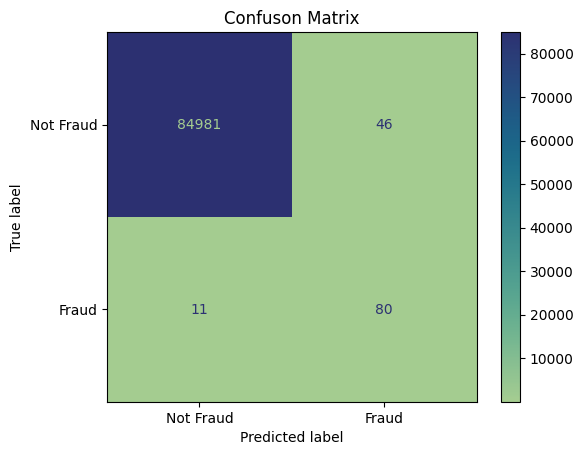

In [39]:
matrix2=confusion_matrix(test_pred,y_test)
cm2=ConfusionMatrixDisplay(matrix2,display_labels=["Not Fraud","Fraud"])
cm2.plot(cmap="crest")
plt.title("Confuson Matrix")
plt.show()

In [40]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")
v3=-0.189374
v4=2.987490
v10=4.544039
v11=1.234665
v12=-4.332084
v14=0.223958
v16=3.4490038
v17=-3.8599388
new_data=[[v3,v4,v10,v11,v12,v14,v16,v17]]
pred=model.predict(new_data)
if(pred==0):
    print("No Fault")
else:
    print("Fault")

No Fault
